In [1]:
import os.path

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import numpy as np

from scipy import stats
from scipy.spatial.distance import cosine

% matplotlib inline
import matplotlib.pyplot as plt

from collections import OrderedDict

import torchvision
from torchvision import transforms

from fashionmnist_cnn import *
from utils import *
from semantic_morphing import semantic_morphing
from path_mask_attribution import explain

In [2]:
DISABLE_CUDA = False

if not DISABLE_CUDA and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [3]:
dataset = FashionMNIST(
    os.path.join(*'data/fashionMNIST'.split('/')),
    batch_size=32, val_size=.2
)

In [4]:
model = load_model(fashionmnist_model(), os.path.join('models', 'fashionmnist.pt'), device)

model.eval()
test_accuracy = 0

with torch.no_grad():
    for X, y, label in dataset.test_loader:
        X = X.to(device); y = y.to(device)

        pred = model(X)
        test_accuracy += (torch.argmax(pred, 1) == y).sum()

test_accuracy = test_accuracy.item() / dataset.test_size

print('Test accuracy: %.3f' % test_accuracy)
print('Test error rate: %.3f' % (1 - test_accuracy))

Test accuracy: 0.920
Test error rate: 0.080


In [5]:
emb_dim = 100

vae = ConvVAE(emb_dim).to(device)
model_path = os.path.join('models', 'conv_vae_fashionmnist.pt')
vae.load_state_dict(torch.load(model_path))

vae = vae.eval()

In [6]:
import json

with open(os.path.join('data', 'fashionmnist_conv_vae_norm_means.json')) as f:
    vae.norm_means = json.load(f)
    
vae.norm_means = { int(k): v for k, v in vae.norm_means.items() }

vae.norm_means

{-1: 2.1720826625823975,
 0: 2.1901679039001465,
 1: 2.43392014503479,
 2: 2.1937754154205322,
 3: 1.9419515132904053,
 4: 1.9880778789520264,
 5: 2.361179828643799,
 6: 1.900506615638733,
 7: 2.227470636367798,
 8: 2.155830144882202,
 9: 2.327273368835449}

58673


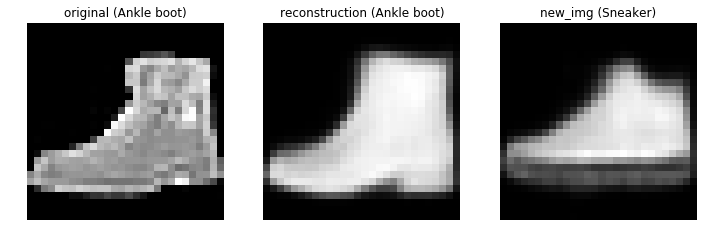

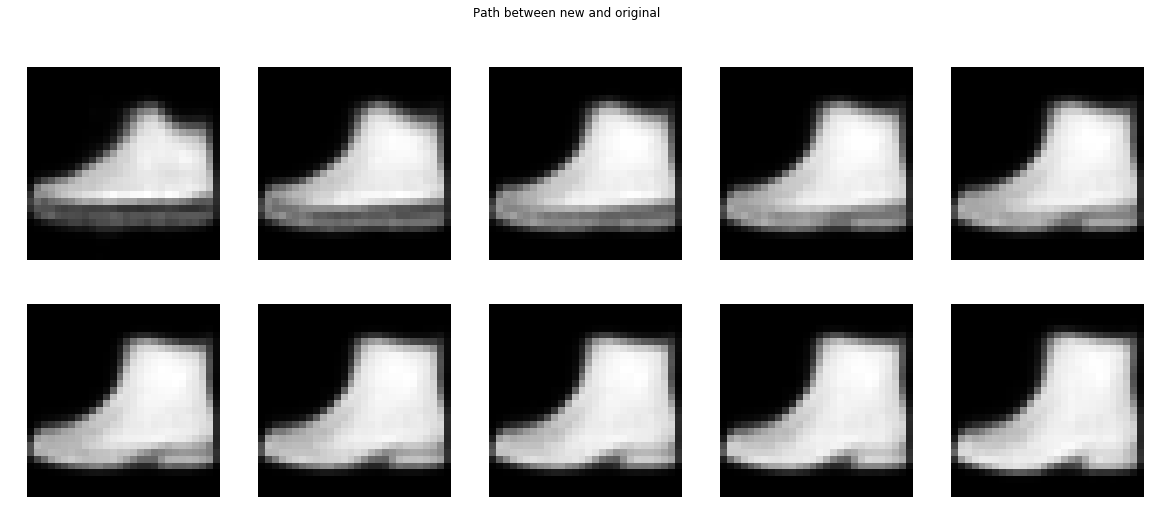

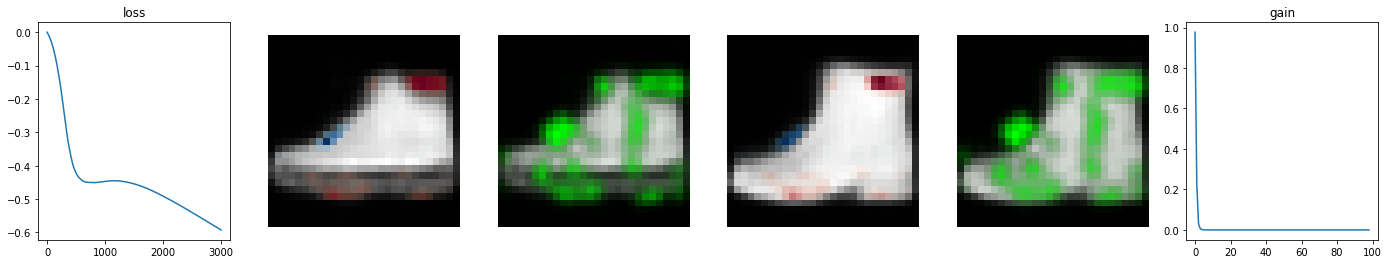

In [55]:
idx = 58673 # (Ankle boot to Sneaker)
print(idx)

# Obtain image and its label from idx
original_img, real_label, real_class = dataset[idx]

original_label, new_label, path, path_emb, mask = explain(
    dataset, model, vae, device, original_img, real_label, 
    semantic_morphing_max_iters=5000, semantic_morphing_alpha_lk=10.,
    mask_iters=3000, mask_reg_alpha=1., mask_l1_ratio=1.
)

7888


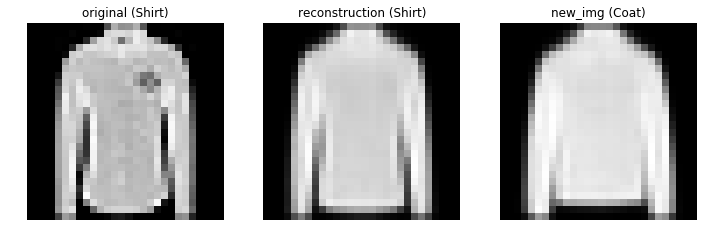

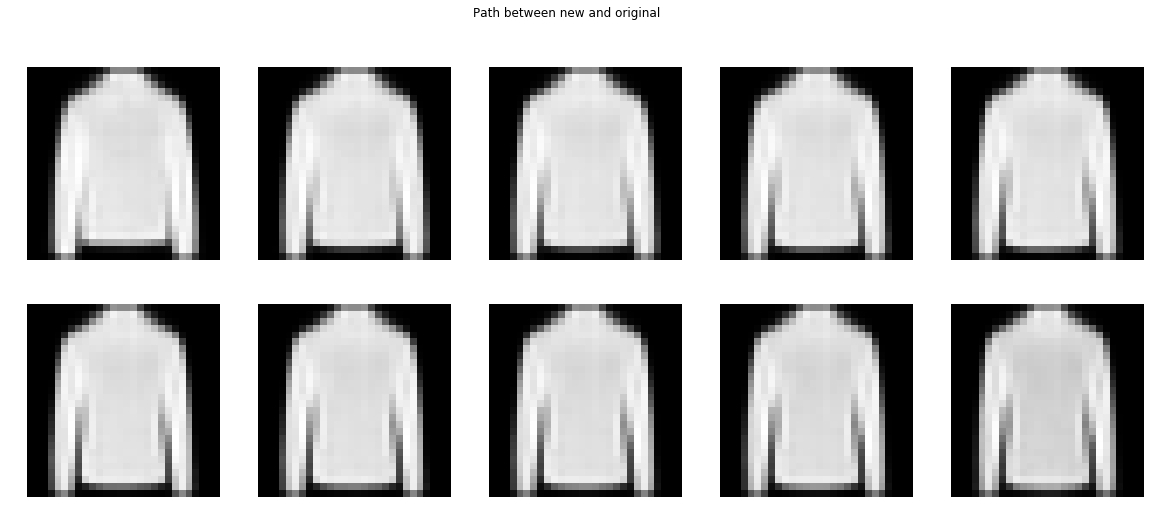

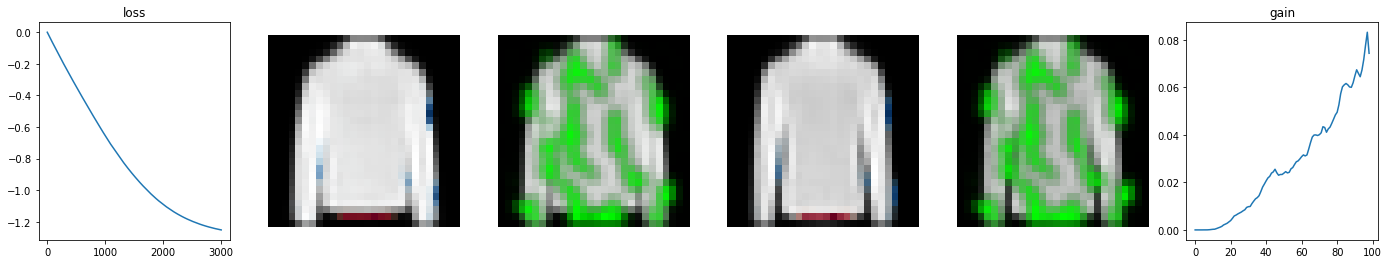

In [13]:
idx = 7888 # (shirt to coat)
print(idx)

# Obtain image and its label from idx
original_img, real_label, real_class = dataset[idx]

original_label, new_label, path, path_emb, mask = explain(
    dataset, model, vae, device, original_img, real_label, 
    semantic_morphing_max_iters=5000, semantic_morphing_alpha_lk=10.,
    mask_iters=3000, mask_reg_alpha=1., mask_l1_ratio=1.
)

10266


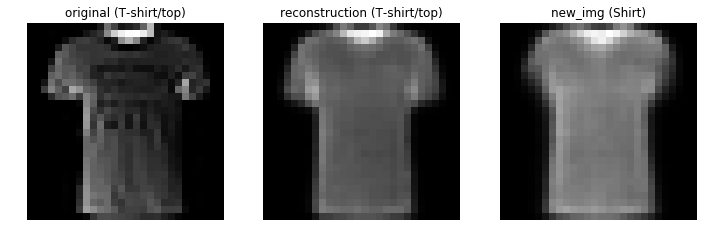

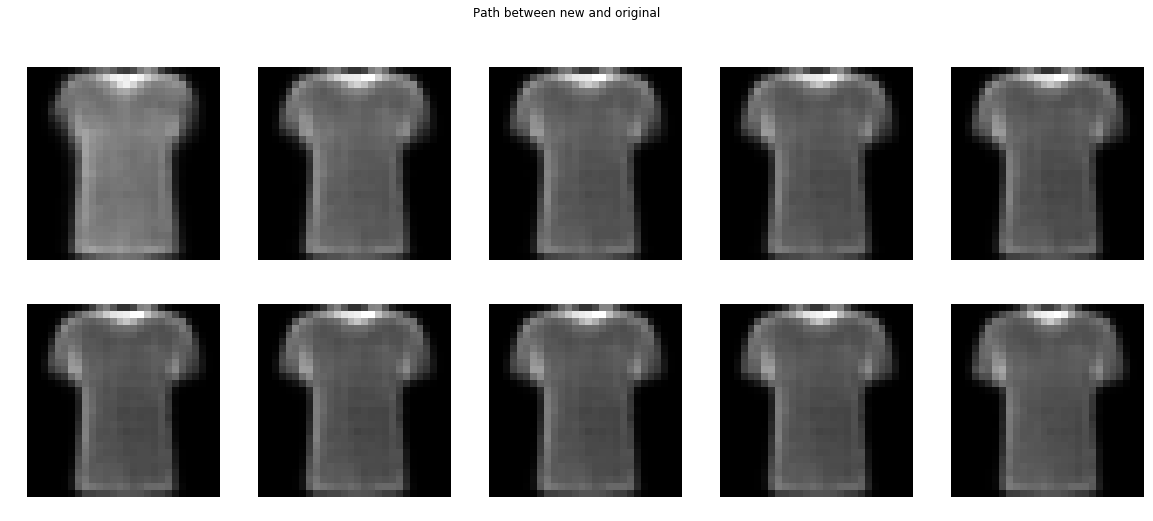

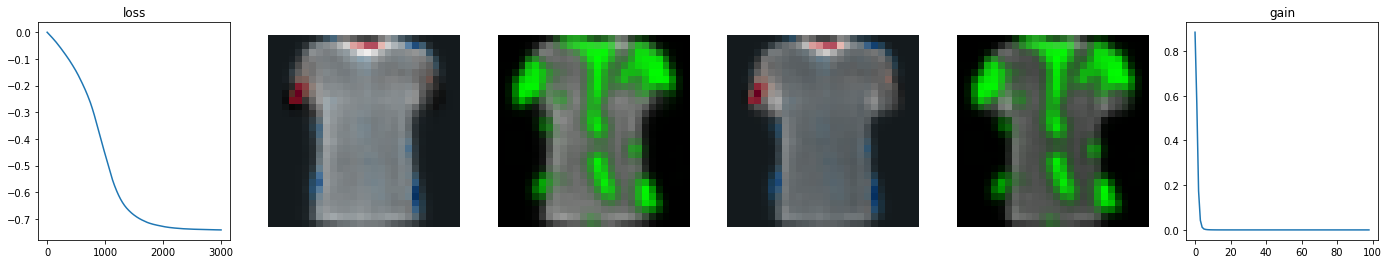

In [38]:
idx = np.random.choice(dataset.train)
#idx = 11877 # (G to H)
print(idx)

# Obtain image and its label from idx
original_img, real_label, real_class = dataset[idx]

original_label, new_label, path, path_emb, mask = explain(
    dataset, model, vae, device, original_img, real_label, 
    semantic_morphing_max_iters=5000, semantic_morphing_alpha_lk=10.,
    mask_iters=3000, mask_reg_alpha=1., mask_l1_ratio=1.
)

15665


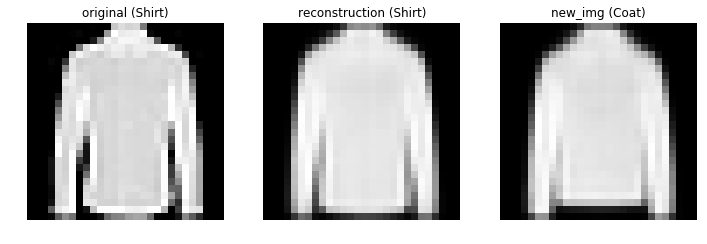

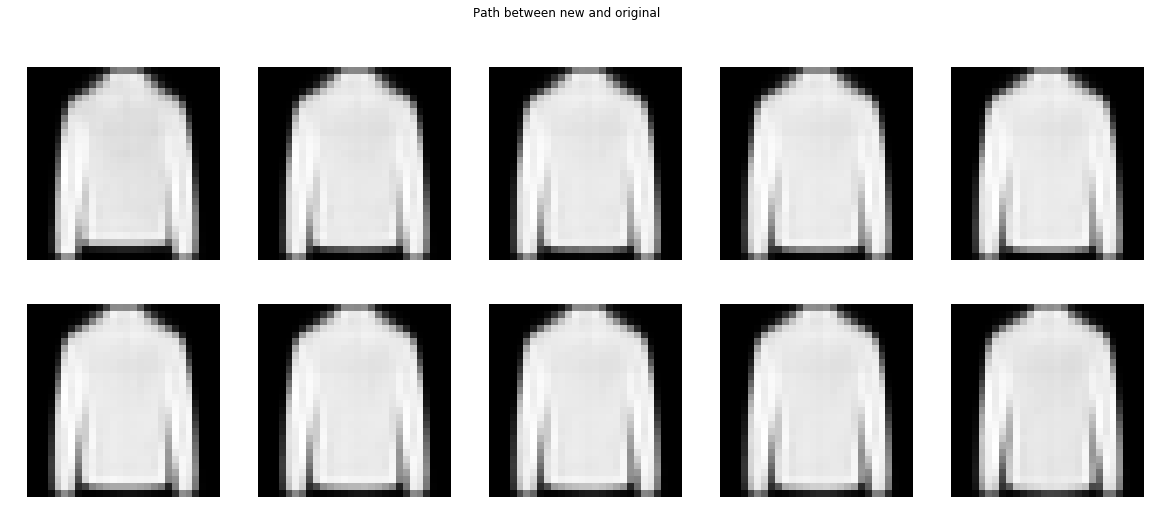

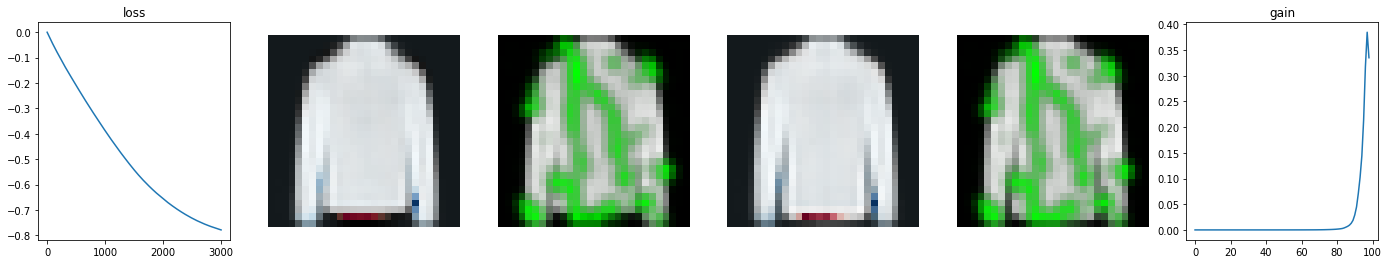

In [39]:
idx = np.random.choice(dataset.train)
#idx = 11877 # (G to H)
print(idx)

# Obtain image and its label from idx
original_img, real_label, real_class = dataset[idx]

original_label, new_label, path, path_emb, mask = explain(
    dataset, model, vae, device, original_img, real_label, 
    semantic_morphing_max_iters=5000, semantic_morphing_alpha_lk=10.,
    mask_iters=3000, mask_reg_alpha=1., mask_l1_ratio=1.
)

6585


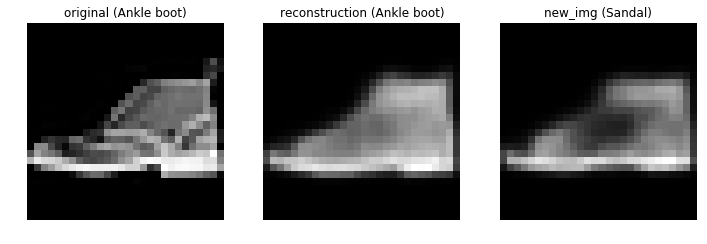

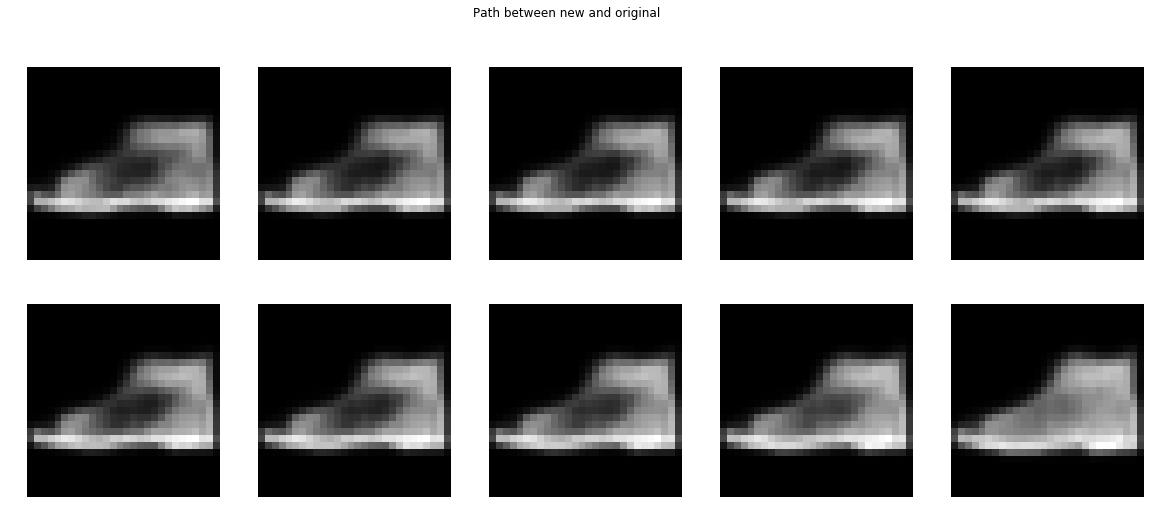

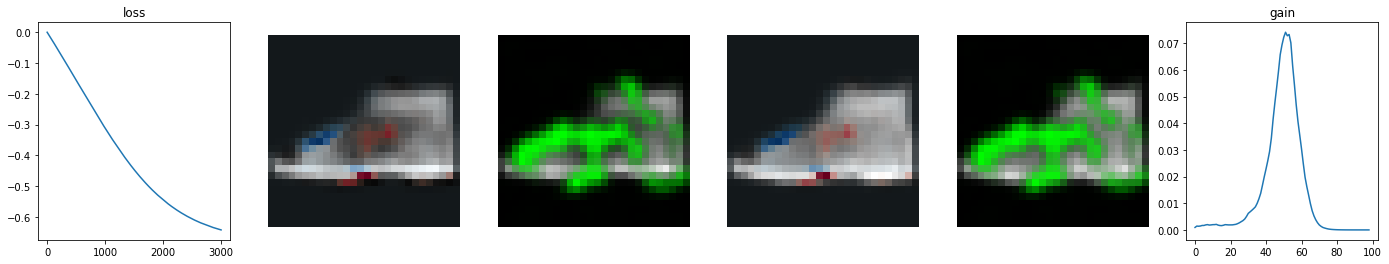

In [52]:
idx = np.random.choice(dataset.train)
print(idx)

# Obtain image and its label from idx
original_img, real_label, real_class = dataset[idx]

original_label, new_label, path, path_emb, mask = explain(
    dataset, model, vae, device, original_img, real_label, 
    semantic_morphing_max_iters=5000, semantic_morphing_alpha_lk=10.,
    mask_iters=3000, mask_reg_alpha=1., mask_l1_ratio=1.
)